# **Task 1 - Diamond Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfs=pd.read_csv('diamonds.csv',usecols=['carat','cut','clarity','color','depth','table','price','x','y','z'],dtype={"price":np.float64})

In [3]:
dfs.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
27604,2.15,Ideal,H,SI1,61.5,60.0,18470.0,8.17,8.29,5.06
24974,2.04,Premium,J,VS2,61.4,59.0,13477.0,8.04,8.14,4.97
43870,0.53,Very Good,G,VS2,62.5,56.0,1450.0,5.16,5.18,3.23
16596,1.04,Ideal,G,VS2,61.9,57.0,6628.0,6.48,6.50,4.02
50565,0.70,Very Good,F,SI1,59.1,59.0,2278.0,5.76,5.91,3.45
10428,1.09,Ideal,H,SI1,61.9,56.0,4784.0,6.61,6.64,4.10
30074,0.32,Ideal,E,SI1,61.8,55.0,720.0,4.45,4.42,2.74
29792,0.30,Premium,D,SI1,61.0,60.0,709.0,4.35,4.30,2.64
20457,1.24,Ideal,G,VS2,62.3,57.0,8799.0,6.95,6.89,4.31
23650,1.50,Very Good,H,VVS1,60.9,61.0,11688.0,7.36,7.39,4.49


In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [5]:
dfs.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
missing_val=dfs.isnull().sum()
print("Missing Values:\n", missing_val)

Missing Values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [7]:
fraction_missing = missing_val.sum() / (len(dfs) * len(dfs.columns))
print(f"Fraction of data with missing values: {fraction_missing:.2%}")

Fraction of data with missing values: 0.00%


**NO MISSING VALUES**

In [8]:
numerical_cols = dfs.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = dfs.select_dtypes(include=['object']).columns
fraction_numerical = len(numerical_cols) / len(dfs.columns)
fraction_categorical = len(categorical_cols) / len(dfs.columns)
print(f"Fraction of numerical variables: {fraction_numerical:.2%}")
print(f"Fraction of categorical variables: {fraction_categorical:.2%}")

Fraction of numerical variables: 70.00%
Fraction of categorical variables: 30.00%


**REMOVING ROWS WITH VALUES OF X, Y AND Z EQUALS TO ZERO**

In [9]:
dfs = dfs.drop(dfs[dfs["x"]==0].index)
dfs = dfs.drop(dfs[dfs["y"]==0].index)
dfs = dfs.drop(dfs[dfs["z"]==0].index)

In [10]:

dfs

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


**20 rows are removed**

 **CREATING A COPY DATAFRAME WITH NUMERICAL FEATURES TO FIND CORRELATION WITH PRICE**

In [11]:
ndf=dfs.copy()
selected_columns: list[str] = ['carat', 'depth', 'table','price','x','y','z']
ndf: pd.DataFrame = dfs[selected_columns].copy(deep=True)
ndf

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


In [12]:
ndf.corr()['price']

,price
carat,0.921592
depth,-0.010729
table,0.127245
price,1.000000
x,0.887231
y,0.867864
z,0.868206


****"depth" & "table" show less correlation with price****

****PAIRPLOT OF DATA****

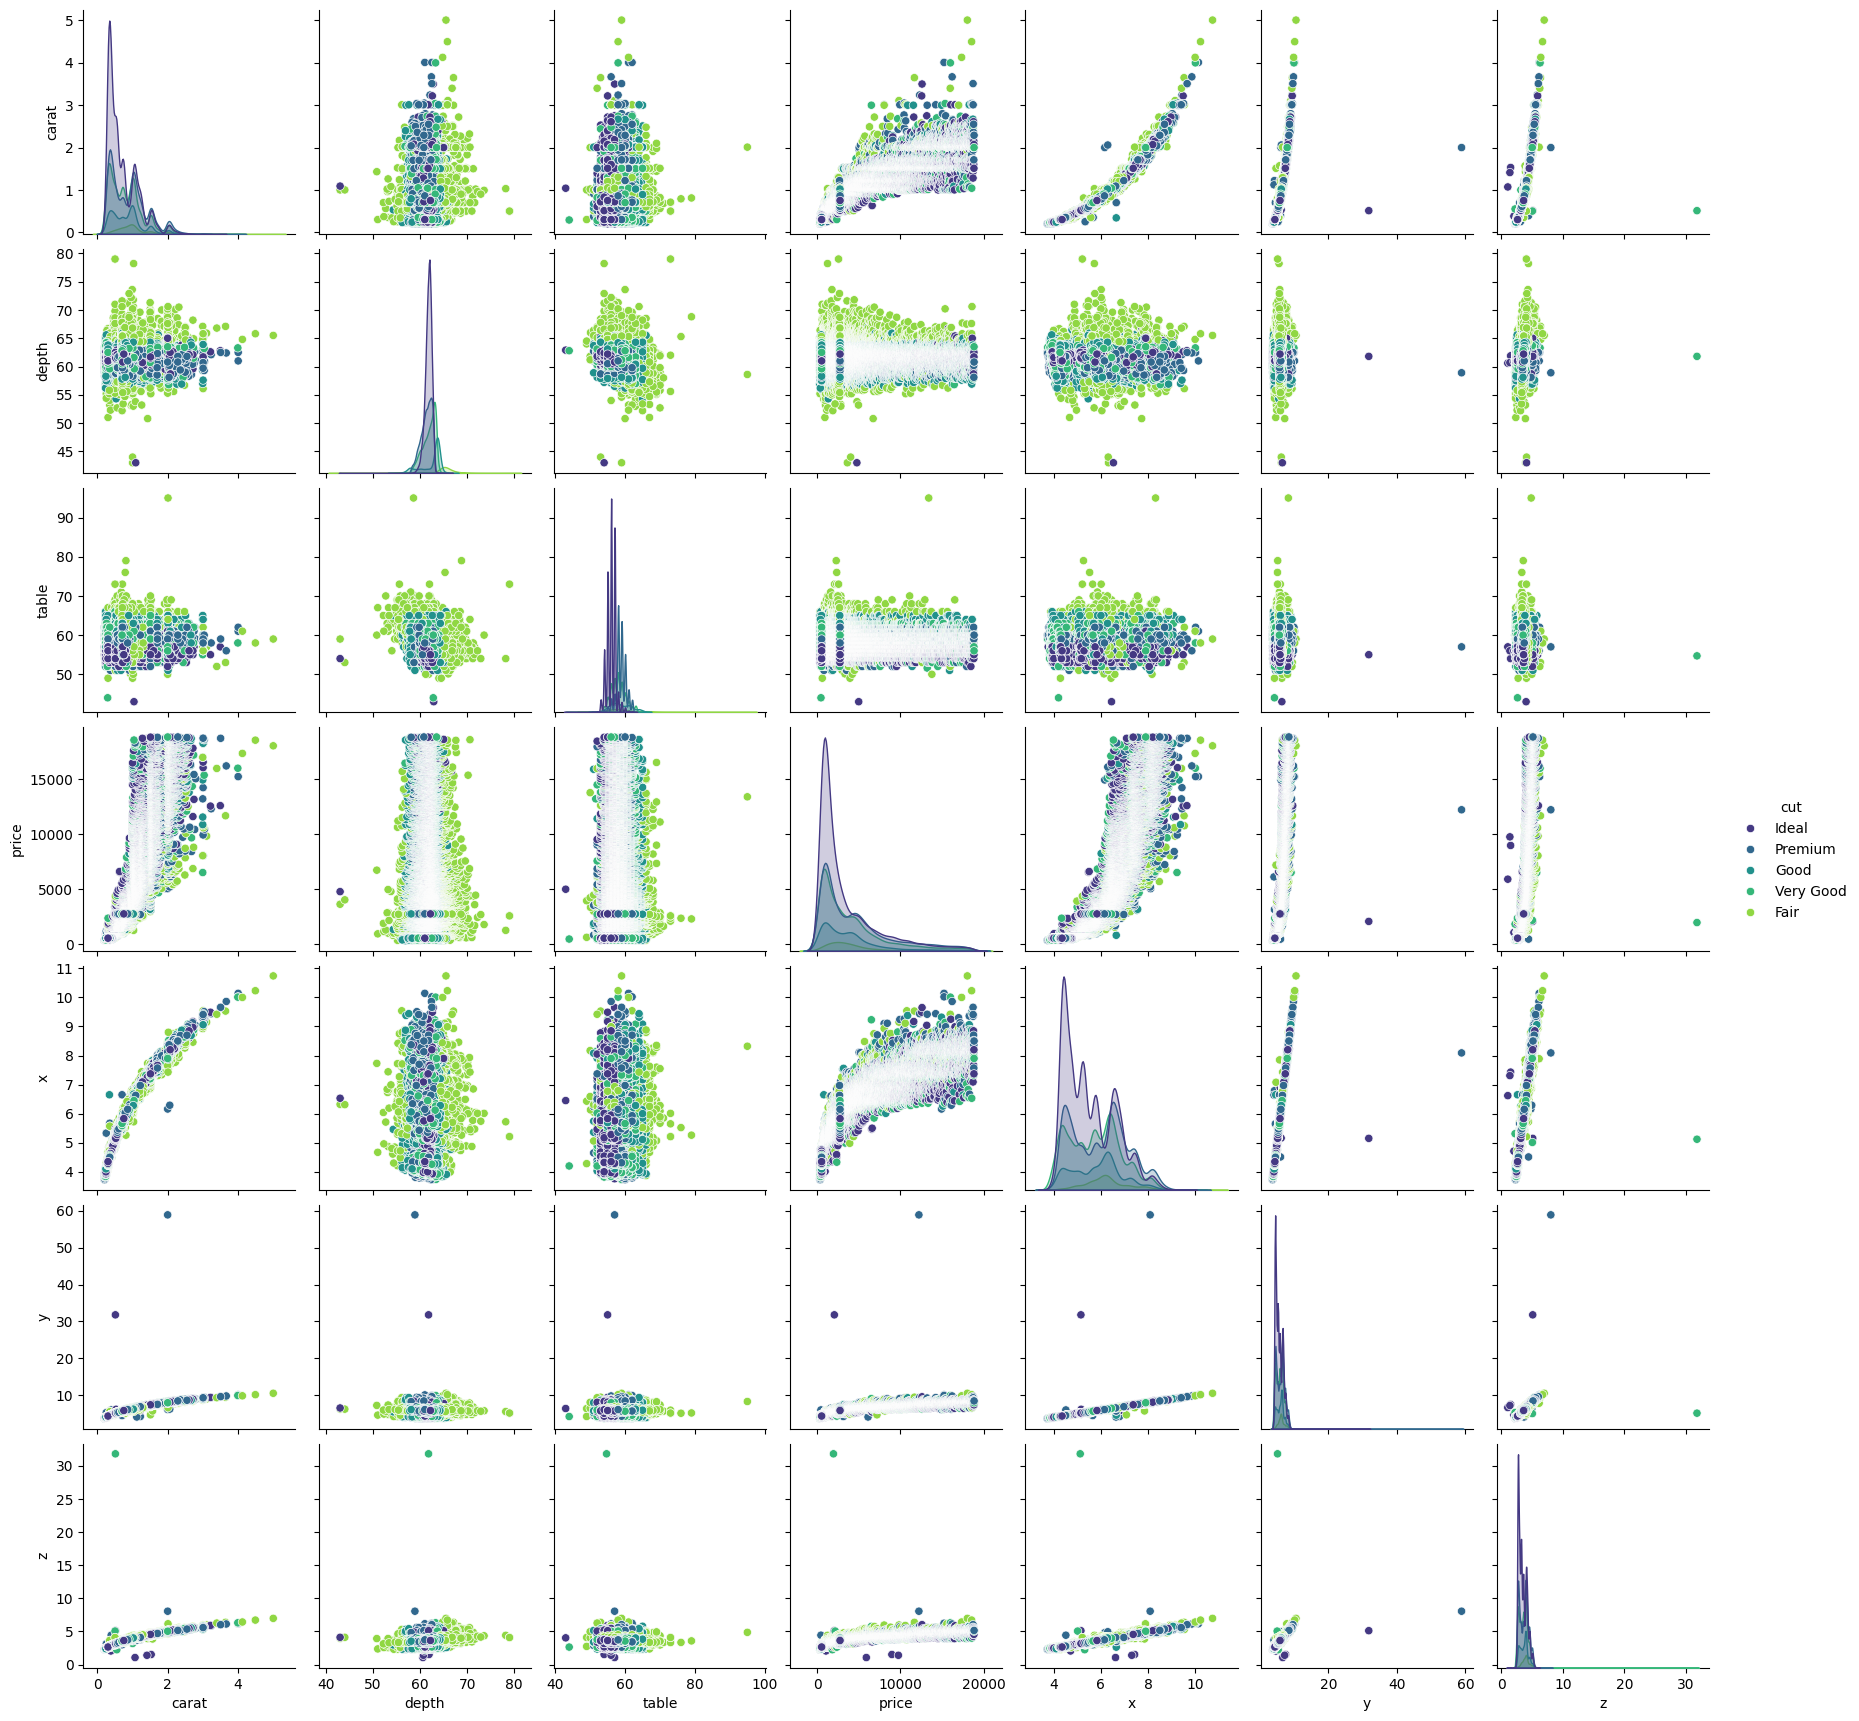

In [13]:
ax=sns.pairplot(dfs, hue= "cut",palette="viridis")

****VISUALIZATION OF DATA ON 4C'S OF DIAMOND - CARAT ,CUT, CLARITY & COLOR****

<ipython-input-47-b4aa3409c8e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfs['price'], kde=True,hist=False)


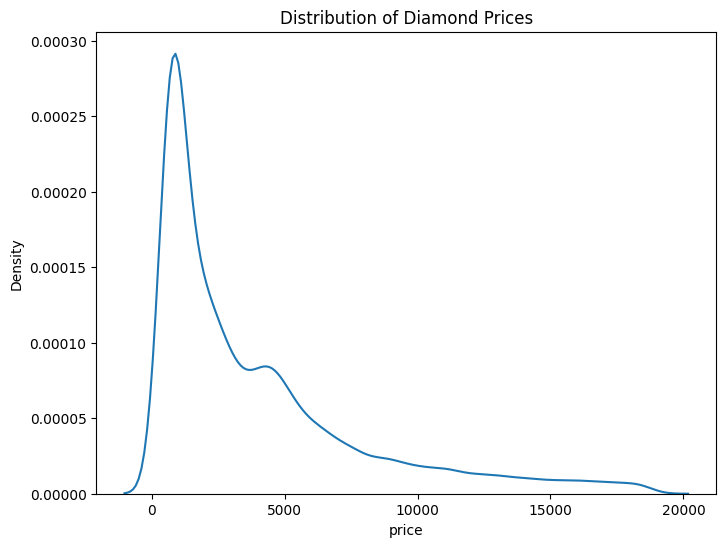

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(dfs['price'], kde=True,hist=False)
plt.title('Distribution of Diamond Prices')
plt.show()

In [ ]:
dfs['price'].skew()

1.6183486340820077

**POSITIVELY SKEWED DATASET OF PRICE COLUMN**

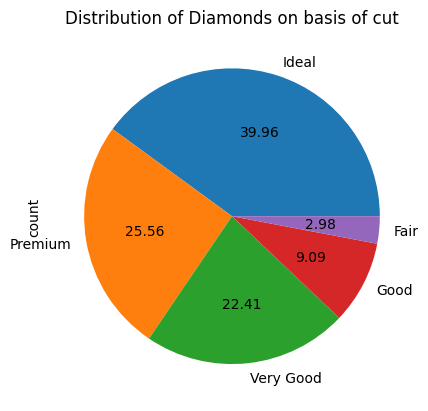

In [ ]:
dfs['cut'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Distribution of Diamonds on basis of cut')
plt.show()

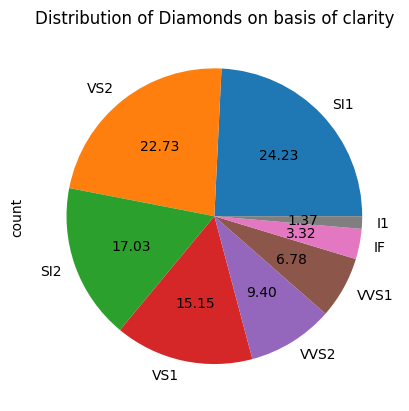

In [ ]:
dfs['clarity'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Distribution of Diamonds on basis of clarity')
plt.show()

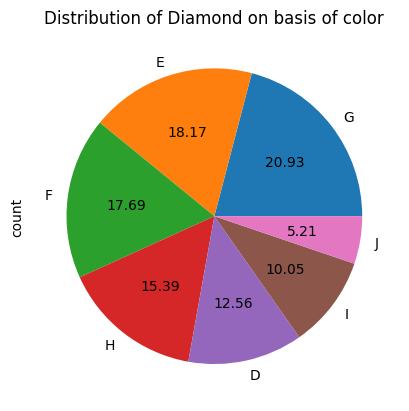

In [ ]:
dfs['color'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Distribution of Diamond on basis of color')
plt.show()

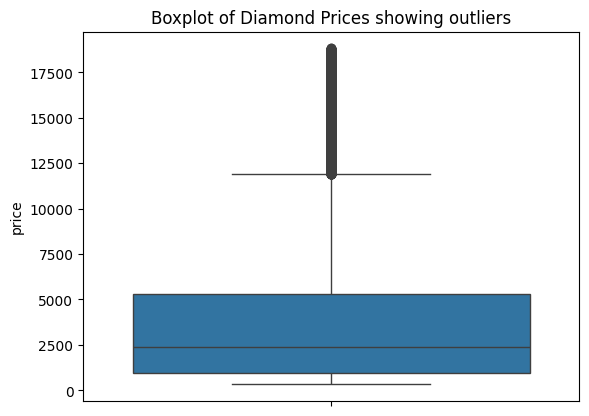

In [ ]:
sns.boxplot(dfs['price'])
plt.title('Boxplot of Diamond Prices showing outliers')
plt.show()

**DATA PREPROCESSING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
s = (dfs.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


****CONVERTING CATEGORICAL VALUES USING LABEL ENCODER****

In [ ]:
df1 = dfs.copy()
labenc = LabelEncoder()
for col in object_cols:
    df1[col] = labenc.fit_transform(df1[col])
df1.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
13580,1.21,3,5,2,60.6,56.0,5556.0,6.97,6.89,4.20
12083,0.90,4,2,5,62.7,58.0,5160.0,6.12,6.19,3.86
28925,0.30,2,3,7,61.5,55.0,684.0,4.30,4.32,2.65
29743,0.32,2,4,6,61.3,56.0,708.0,4.41,4.43,2.71
1233,0.81,4,2,3,62.7,58.0,2942.0,5.92,5.95,3.72


In [ ]:
df1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.553079,2.594028,3.835441,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.027705,1.701272,1.724549,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


****EXPLORARY DATA ANALYSIS****

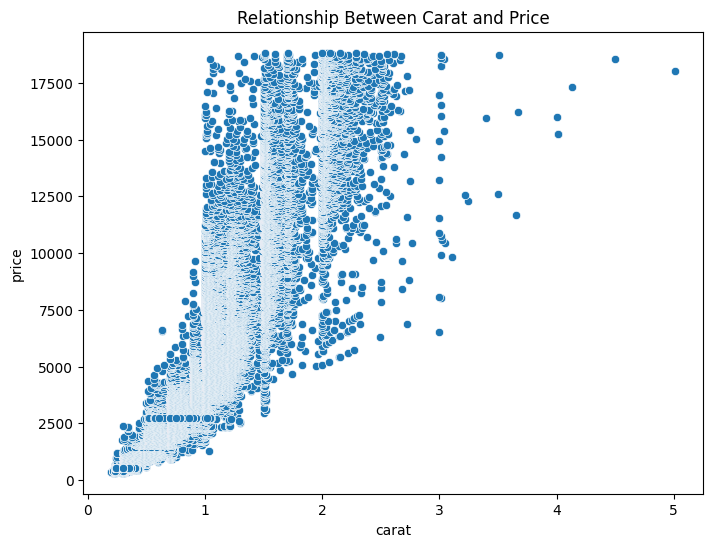

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=df1)
plt.title('Relationship Between Carat and Price')
plt.show()

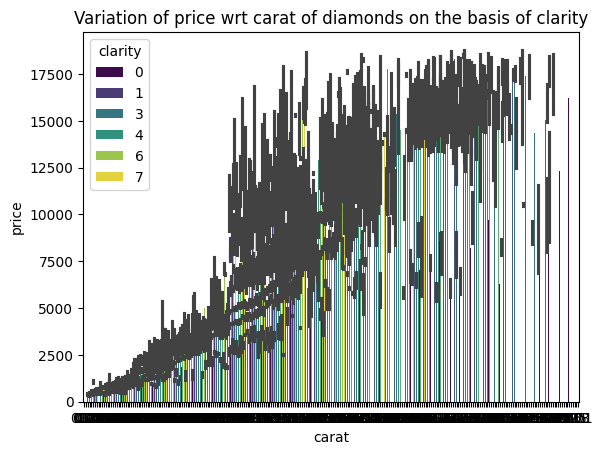

In [ ]:
sns.barplot(x=df1['carat'], y=df1['price'], hue=df1['clarity'], palette='viridis')
plt.title("Variation of price wrt carat of diamonds on the basis of clarity")
plt.show()

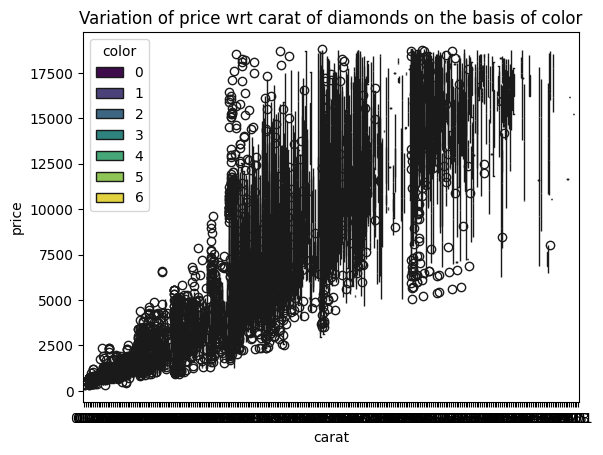

In [ ]:
sns.boxplot(x=df1['carat'],y=df1['price'],hue=df1['color'],palette='viridis')
plt.title("Variation of price wrt carat of diamonds on the basis of color")
plt.show()

<ipython-input-41-2438ff9c4ab4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['cut']==0]['price'],hist=False)
<ipython-input-41-2438ff9c4ab4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1['cut']==1]['price'],hist=False)
<ipython-input-41-2438ff9c4ab4>:3: U

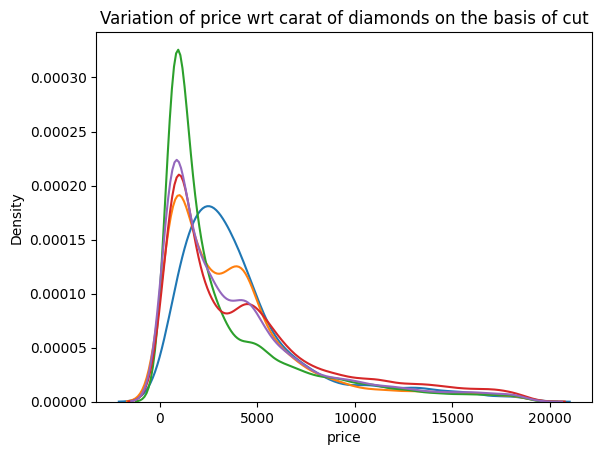

In [ ]:
sns.distplot(df1[df1['cut']==0]['price'],hist=False)
sns.distplot(df1[df1['cut']==1]['price'],hist=False)
sns.distplot(df1[df1['cut']==2]['price'],hist=False)
sns.distplot(df1[df1['cut']==3]['price'],hist=False)
sns.distplot(df1[df1['cut']==4]['price'],hist=False)
plt.title("Variation of price wrt carat of diamonds on the basis of cut")
plt.show()

****CORRELATION MATRIX plot using HEATMAP****

<Axes: >

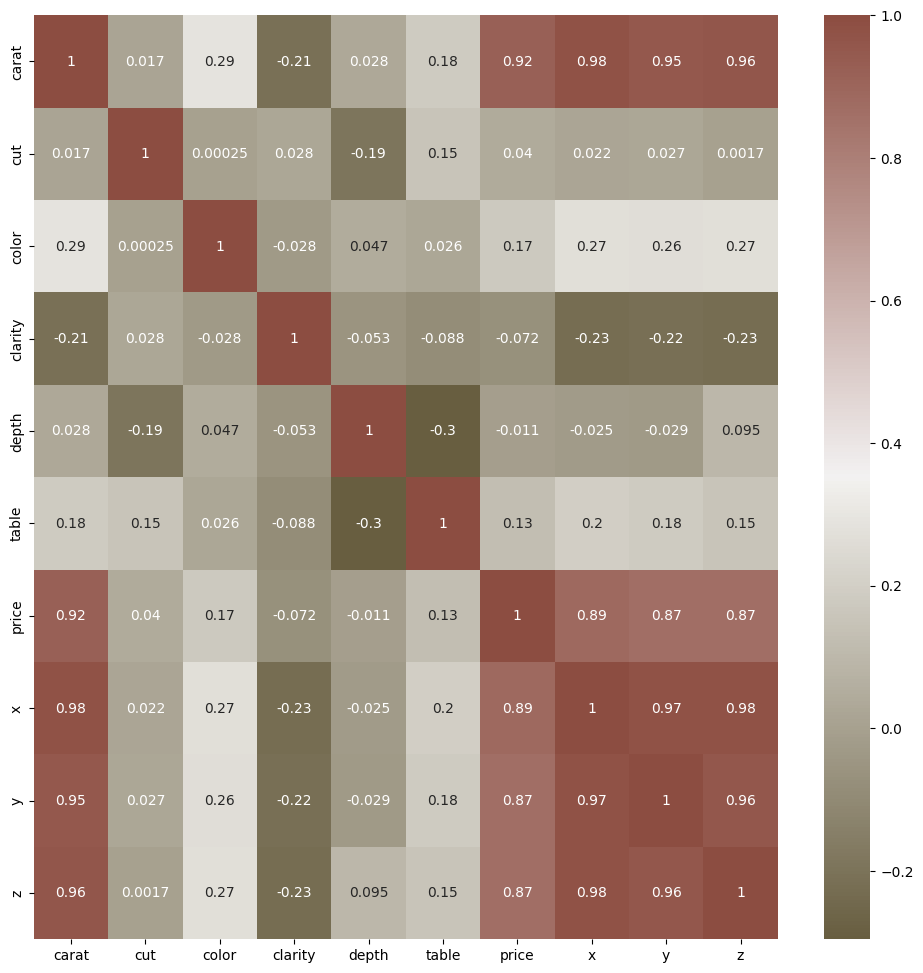

In [ ]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df1.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**"x", "y" and "z" show a high correlation to the target column.
"depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.**

****BUILDING REGRESSION MODEL****

In [ ]:

X= df1.drop(["price"],axis =1)
y= df1["price"]


****FITTING THE NUMERICAL DATA USING STANDARD SCALER AND CATEGORICAL DATA USING ONE HOT ENCODER ****

In [ ]:
nuf= X.select_dtypes(include=['float64']).columns
ctf = X.select_dtypes(include=['object']).columns

sc= StandardScaler()
ctr = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', sc, nuf),
        ('cat', ctr, ctf)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
X_test.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z
34959,0.32,3,4,5,62.7,58.0,4.33,4.35,2.72
25672,2.20,2,6,2,61.5,57.0,8.41,8.37,5.16
18215,1.03,2,2,5,62.3,56.0,6.43,6.45,4.01
4591,1.11,3,0,0,61.9,58.0,6.66,6.63,4.11
17919,1.21,2,4,5,62.4,59.0,6.81,6.79,4.24


In [ ]:
y_train.sample(5)

,price
12330,5226.0
5975,3951.0
34180,854.0
6581,4078.0
38814,1046.0


****TESING THE MODEL****

In [ ]:
preprocessor.fit(X_train)
X_train_pre = preprocessor.transform(X_train)
X_test_pre = preprocessor.transform(X_test)
model = LinearRegression()
model.fit(X_train_pre, y_train)
y_pred = model.predict(X_test_pre)


****EVALUATING PERFORMANCE****

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")


Root Mean Squared Error (RMSE): 1478.32
R-squared (R2): 0.86


****PLOTTING DECISION TREE USING MATPLOTLIB****

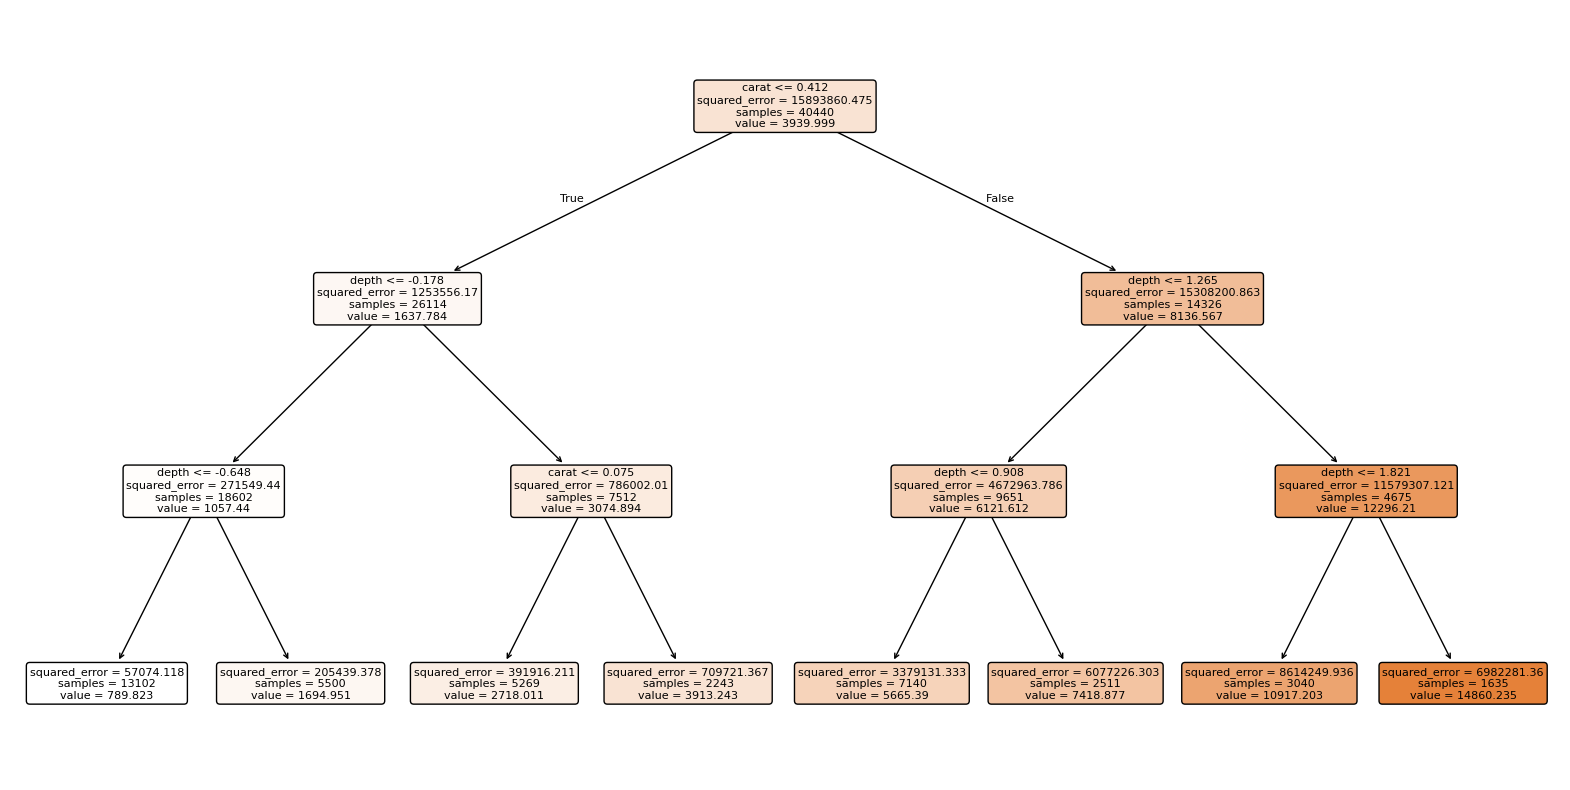

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_train_pre, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model,
               feature_names=list(X.columns),
               filled=True,
               rounded=True,
               fontsize=8)
plt.show()
